# ML basics with keras

## Basic classification: Classify images of clothing

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

* img = 28*28. pixel from 0 to 255
* label is an array of integers, ranging from 0 to 9
* train_img and train_label are arrays
* test_img and test_label are arrays

* Label	Class
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 
               'Ankle boot']

In [ ]:
print(train_img.shape)
print(test_label.shape)
print(test_img.shape)
print(test_label.shape)

In [ ]:
print(len(train_img))
print(len(test_label))
print(len(test_img))
print(len(test_label))

In [ ]:
print(train_label)
print(test_label)

In [ ]:
print(set(train_label))
print(set(test_label))

In [ ]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.show()

In [ ]:
train_img[0]

In [ ]:
train_img = train_img / 255
test_img = test_img / 255

In [ ]:
train_img[0]

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

* flatten layer transforms from a 2 dim array 28*28 to 1 dim array 28*28 = 784 pixel
* flatten layer unstacks rows of pixels in the img and liné them up
* flatten layer has no parameter to learn, only reformats the data
*  dense layer caculates output = activation(dot(input, kernel) + bias))
* 1st dense layer has 128 nodes (neurons)
* 2nd has a logit array with length of 10
* each node contains a score that indicates the current image belongs to one of the 10 classes

* Before train, compile model by
* loss function
* optimizer
* metric. 'accuracy' is used to measure the fraction of the image that are correctly classified

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

* Training model requires the following steps:
* feed training data to the model

In [ ]:
model.fit(train_img, train_label, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_label, verbose=2)
print('\nTest acc', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [ ]:
prediction = probability_model.predict(test_img)

In [ ]:
prediction[0]

In [ ]:
max(prediction[0])

In [ ]:
np.argmax(prediction[0])  # return the indice of maximum value

In [ ]:
test_label[0]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_label)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_label)
plt.show()

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_label, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_label)
plt.tight_layout()
plt.show()

In [ ]:
img = test_img[1]
img.shape

In [ ]:
img = (np.expand_dims(img, 0))
img.shape

In [ ]:
prediction_single = probability_model(img)
prediction_single

In [ ]:
plot_value_array(1, prediction_single[0], test_label)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(prediction_single[0])

## Basic text classification

In [29]:
import tensorflow as tf
import os
import shutil
import re
import string
import matplotlib.pyplot as plt

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [2]:
tf.__version__

'2.4.0-dev20200913'

* use the Large Movie Review Dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. 
* These are split into 25,000 reviews for training and 25,000 reviews for testing. 
* The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

### Download and explore the IMDB dataset

In [3]:
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
#                                   untar=True, 
#                                   cache_dir='.', cache_subdir='',)

In [4]:
dataset_dir = os.path.join(os.path.dirname('/media/veec20/Data/duongdq/TF_tutorial/'), 'aclImdb')

In [5]:
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [6]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

* The aclImdb/train/pos and aclImdb/train/neg directories contain many text files
* each of which is a single movie review.

In [7]:
txt_dir = os.path.join(train_dir, 'pos')
os.listdir(txt_dir)

['0_9.txt',
 '10000_8.txt',
 '10001_10.txt',
 '10002_7.txt',
 '10003_8.txt',
 '10004_8.txt',
 '10005_7.txt',
 '10006_7.txt',
 '10007_7.txt',
 '10008_7.txt',
 '10009_9.txt',
 '1000_8.txt',
 '10010_7.txt',
 '10011_9.txt',
 '10012_8.txt',
 '10013_7.txt',
 '10014_8.txt',
 '10015_8.txt',
 '10016_8.txt',
 '10017_9.txt',
 '10018_8.txt',
 '10019_8.txt',
 '1001_8.txt',
 '10020_8.txt',
 '11_9.txt',
 '12000_8.txt',
 '12001_8.txt',
 '12002_10.txt',
 '12003_10.txt',
 '12004_10.txt',
 '12005_10.txt',
 '12006_10.txt',
 '12007_10.txt',
 '12008_8.txt',
 '12009_10.txt',
 '1200_10.txt',
 '12010_10.txt',
 '12011_10.txt',
 '12012_10.txt',
 '12013_10.txt',
 '12014_10.txt',
 '12015_10.txt',
 '12016_7.txt',
 '12017_7.txt',
 '12018_7.txt',
 '12019_8.txt',
 '1201_8.txt',
 '12020_7.txt',
 '12021_9.txt',
 '12022_10.txt',
 '12023_9.txt',
 '12024_7.txt',
 '12025_7.txt',
 '12026_8.txt',
 '12027_10.txt',
 '12028_10.txt',
 '12029_10.txt',
 '8200_8.txt',
 '8201_8.txt',
 '8202_10.txt',
 '8203_7.txt',
 '8204_8.txt',
 '82

In [8]:
sample_file = os.path.join(train_dir, 'pos/12346_10.txt')
with open(sample_file) as f:
  print(f.read())

This is a very fine and poetic story. Beautiful scenery. Magnificent music score. I've been twice in Japan last year and the movie gave me this typical Japanese feeling. The movement of the camera is superb, as well as the actors. It goes deep into your feelings without becoming melodramatic. Japanese people are very sensitive and kind and it's all very well brought onto the screen here. The director is playing superb with light an colors and shows the audience that it is also possible to let them enjoy a movie with subtle and fine details. Once you've seen this movie you will want to see more from the same director. It's a real feel good movie and I can only recommend it to everybody.


### Load the dataset

* remove unsup folder

In [9]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/media/veec20/Data/duongdq/TF_tutorial/aclImdb/train/unsup'

* use validation_split argument to create a validation set 

In [10]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/media/veec20/Data/duongdq/TF_tutorial/aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset='training',
    seed = seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


* iterate over the dataset and print out a few samples as follows

In [11]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print('review', text_batch.numpy()[i])
        print('label', label_batch.numpy()[i])

review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
label 0
review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

* check which label 0 and 1 correspond to positive and negative movie reviews

print(raw_train_ds.class_names[0])  # neg
print(raw_train_ds.class_names[1])  # pos

* create validation and test set

In [12]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/media/veec20/Data/duongdq/TF_tutorial/aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset='validation',
    seed = seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [13]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    '/media/veec20/Data/duongdq/TF_tutorial/aclImdb/test',
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.


### Prepare the dataset for training

* standardize, tokenize and vectorize
* Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset
* Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace)
* Vectorization refers to converting tokens into numbers so they can be fed into a neural network.

In [14]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                   '[%s]' % re.escape(string.punctuation),
                                   '')

* create TextVectorization to standardize, tokenize and vectorize data
* set ouput_mode = int to create unique integer indices for each token
* define sequence_length which cause the layer to pad or truncate sequences to exactly sequence length values

In [15]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize = custom_standardization,
    max_tokens = max_features,
    output_mode = 'int',
    output_sequence_length = sequence_length)

* call adapt to fit the state of the preprocessing layer to the dataset
* this cause the model to build an index of strings to integers

In [16]:
# make a text only dataset without label, then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

* create function to see the result of using this layer to preprocess some data

In [17]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label


text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_lable = text_batch[0], label_batch[0]
print('review', first_review)
print('\nlabel', raw_train_ds.class_names[first_lable])
print('\nvectorized review', vectorize_text(first_review, first_lable))

review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

* each token has been replaced by an integer
* lookup the token (string) that each integer corresponds to by calling .get_vocabulary()

In [18]:
print('1235--->', vectorize_layer.get_vocabulary()[1235])
print('vocalbulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1235---> attack
vocalbulary size: 10000


* apply the TextVectorization layer to training, validation and test dataset

In [19]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

### Configure the dataset for performance

* when loading data to make sure that I/O does not become blocking
* .cache()
* .prefetch()

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [21]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features + 1, embedding_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


* Embedding layer: 
* GAP: return fixed length output vector for each example by average over the sequence dimension
* Fixed length output vector is piped through a Fully connected (Dense) layer with 16 hidden units
* The last layer is densely connected with a single output node

* facing to the binary classification problem and outputs is probability 

### Loss function and optimizer

In [22]:
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### Train the model

In [24]:
epoch = 10
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=epoch)

Epoch 1/10
625/625 [==============================] - 43s 69ms/step - loss: 0.6811 - binary_accuracy: 0.6151 - val_loss: 0.6111 - val_binary_accuracy: 0.7738
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5767 - binary_accuracy: 0.7859 - val_loss: 0.4955 - val_binary_accuracy: 0.8236
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4639 - binary_accuracy: 0.8333 - val_loss: 0.4184 - val_binary_accuracy: 0.8472
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3899 - binary_accuracy: 0.8606 - val_loss: 0.3727 - val_binary_accuracy: 0.8616
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3425 - binary_accuracy: 0.8777 - val_loss: 0.3443 - val_binary_accuracy: 0.8682
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3088 - binary_accuracy: 0.8890 - val_loss: 0.3250 - val_binary_accuracy: 0.8732
Epoch 7/10
625/625 [==============================] - 1s 2ms/s

### Evaluate the model

In [25]:
loss, acc = model.evaluate(test_ds)

print('loss', loss)
print('acc', acc)

782/782 [==============================] - 258s 325ms/step - loss: 0.3098 - binary_accuracy: 0.8735
loss 0.30979153513908386
acc 0.8734800219535828


### Create a plot of accuracy and loss over time

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

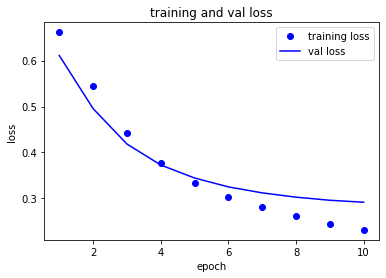

In [31]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, loss, 'bo', label = 'training loss')
plt.plot(epoch, val_loss, 'b', label='val loss')
plt.title('training and val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

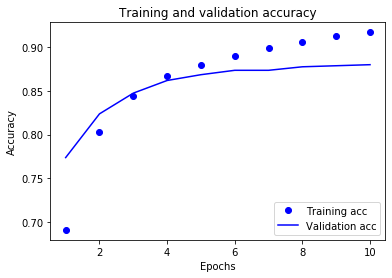

In [33]:
plt.plot(epoch, acc, 'bo', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Export the model

* to make your model capable of processing raw strings
* use a new model to using weights just trained

In [34]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    tf.keras.layers.Activation('sigmoid')
])

export_model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=False),
                    optimizer='adam',
                    metrics=['accuracy'])

loss, acc = export_model.evaluate(raw_test_ds)
print(acc)

782/782 [==============================] - 5s 6ms/step - loss: 0.3102 - accuracy: 0.8741
0.8734800219535828


* There is a performance difference to keep in mind when choosing where to apply your TextVectorization layer.
* Using it outside of your model enables you to do asynchronous CPU processing and buffering of your data when training on GPU. 
* So, if you're training your model on the GPU, you probably want to go with this option to get the best performance while developing your model, then switch to including the TextVectorization layer inside your model when you're ready to prepare for deployment.

### Exercise

## Text classification with TF Hub

## Regression

## Overfit and Underfit

## Save and Load

## Tune hyperparameters with the Keras Tuner

# Load and prepared data

# Estimator